In [9]:
import pandas as pd

In [10]:
df2 = pd.read_csv("reto_db_final.csv")
df2.columns

Index(['indice_lote', 'profundidad_llenado', 'altura_de_alma_precompresión',
       'velocidad_dispositivo_de_llenado',
       'fuerza_de_compresión_principal:_valor_medio',
       'fuerza_de_compresión_principal:_s-rel', 'precompresión:_valor_medio',
       'altura_de_alma_compresión_principal', 'PreC VM[kN]', 'CPVM[kN]',
       'VM[kp]', 'Friabilidad (%)'],
      dtype='object')

# Datos faltantes

In [13]:
map_col = {'indice_lote':'lote',
           'fuerza_de_compresión_principal:_valor_medio': 'fuerza_compresion_principal_media',
           'fuerza_de_compresión_principal:_s-rel': 'fuerza_de_compresión_principal_srel',
           'precompresión:_valor_medio': 'precompresion',
           'PreC VM[kN]': 'PreC_VM',
           'CPVM[kN]': 'CPVM',
           'VM[kp]': 'VM',
           'Friabilidad (%)': 'friabilidad'}
df2.rename(columns=map_col, inplace=True)


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   lote                                 60 non-null     int64  
 1   profundidad_llenado                  59 non-null     float64
 2   altura_de_alma_precompresión         59 non-null     float64
 3   velocidad_dispositivo_de_llenado     54 non-null     float64
 4   fuerza_compresion_principal_media    59 non-null     float64
 5   fuerza_de_compresión_principal_srel  59 non-null     float64
 6   precompresion                        59 non-null     float64
 7   altura_de_alma_compresión_principal  59 non-null     float64
 8   PreC_VM                              60 non-null     float64
 9   CPVM                                 60 non-null     float64
 10  VM                                   60 non-null     float64
 11  friabilidad                       

# Estadísticas

In [15]:
df2.describe()

,lote,profundidad_llenado,altura_de_alma_precompresión,velocidad_dispositivo_de_llenado,fuerza_compresion_principal_media,fuerza_de_compresión_principal_srel,precompresion,altura_de_alma_compresión_principal,PreC_VM,CPVM,VM,friabilidad
count,60.000000,59.000000,59.000000,54.000000,59.000000,59.0,59.000000,59.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,9.386949,3.363559,103.333333,22.367797,10.0,0.261017,2.290508,6.955024,33.782868,8.074682,0.004298
std,17.464249,0.577871,0.275717,21.101730,15.579324,0.0,1.138210,0.204968,3.007082,9.616996,2.166949,0.001417
min,1.000000,8.000000,2.800000,50.000000,0.000000,10.0,0.000000,1.800000,3.070556,19.320000,5.293750,0.002500
25%,15.750000,8.925000,3.200000,100.000000,0.000000,10.0,0.000000,2.140000,4.733792,27.514896,6.453750,0.003300
50%,30.500000,9.480000,3.400000,110.000000,26.000000,10.0,0.000000,2.300000,5.898049,30.385833,7.133442,0.003850
75%,45.250000,9.700000,3.500000,120.000000,32.000000,10.0,0.000000,2.450000,8.097143,38.580010,9.855525,0.005175
max,60.000000,10.700000,4.000000,120.000000,51.000000,10.0,5.400000,2.650000,16.563333,71.139130,13.222222,0.007500


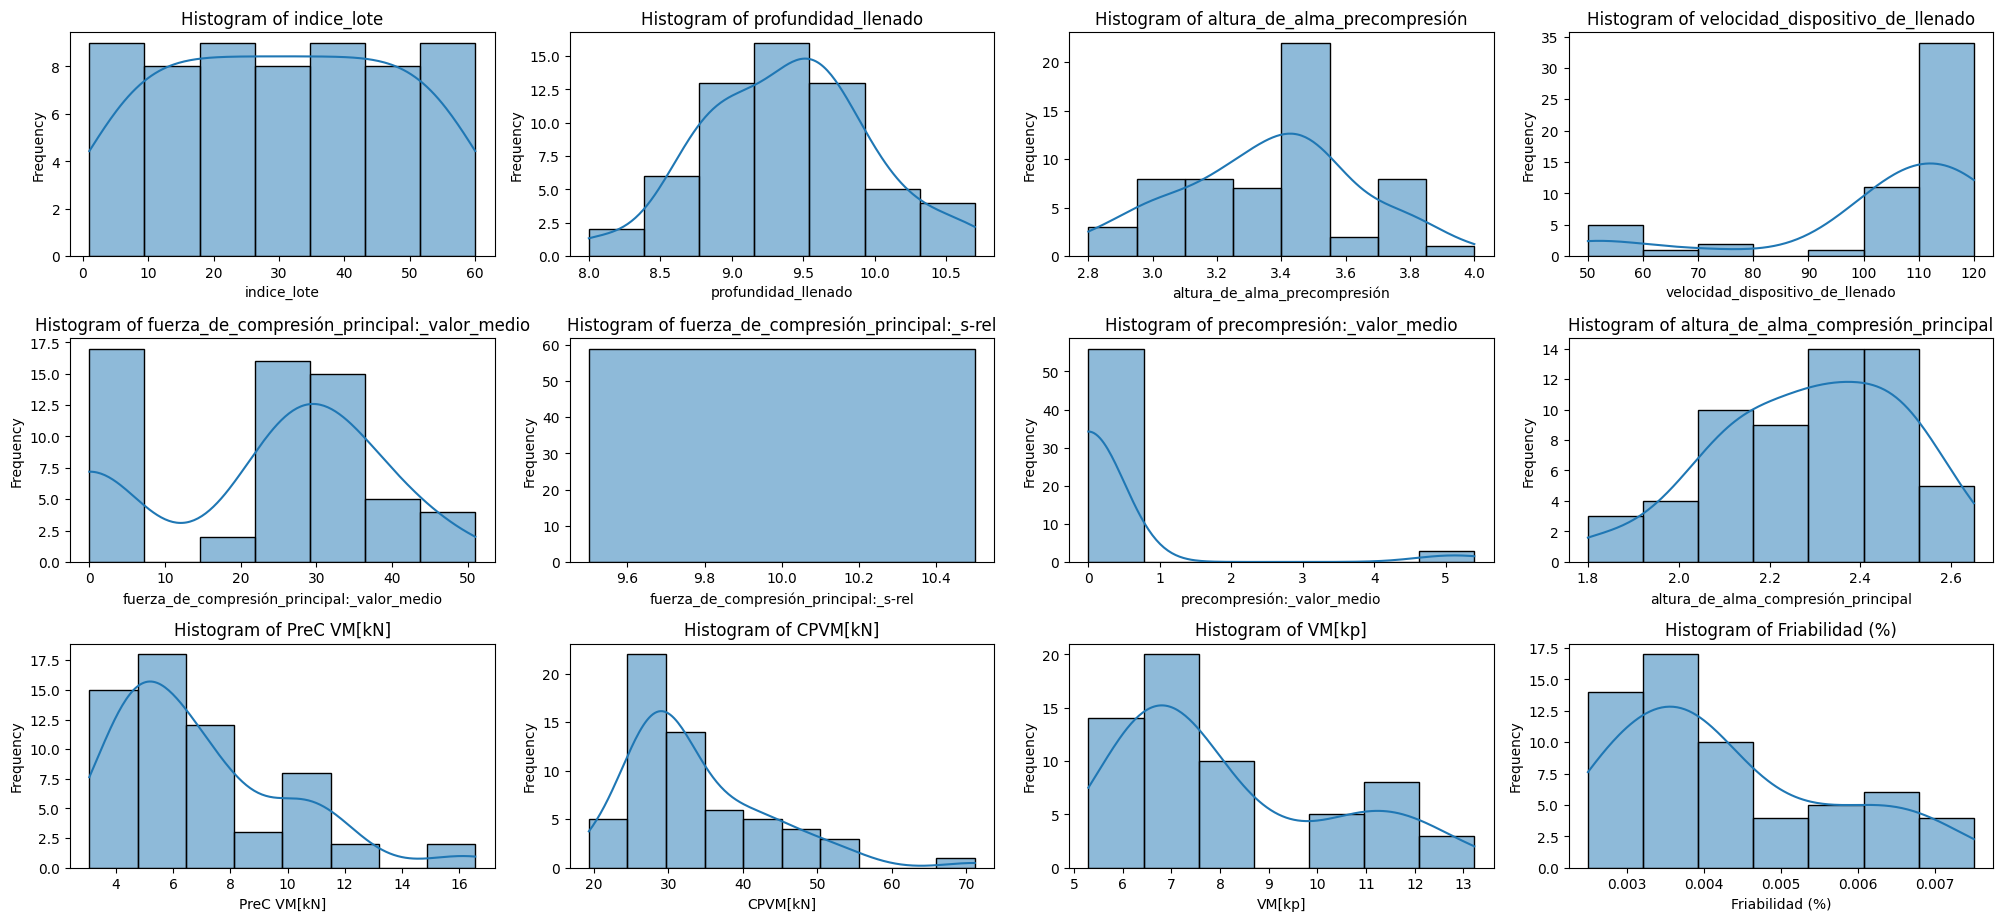

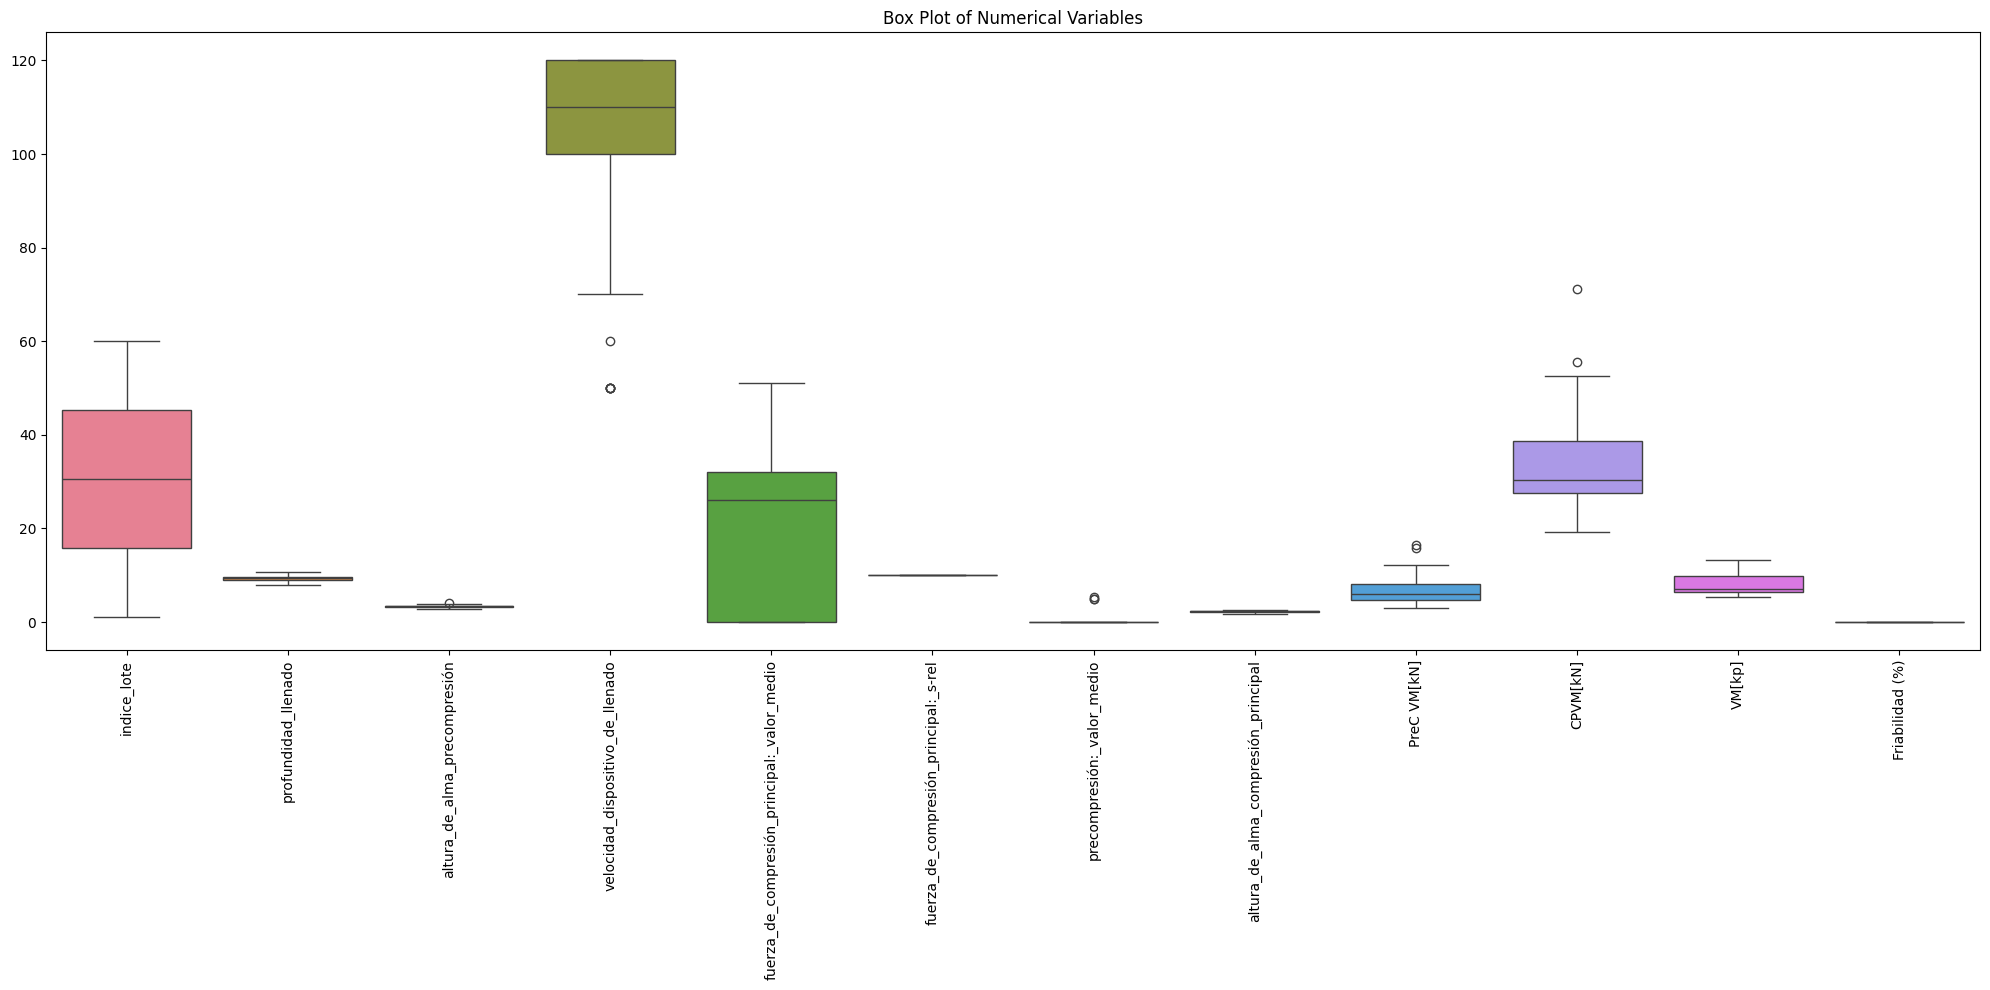

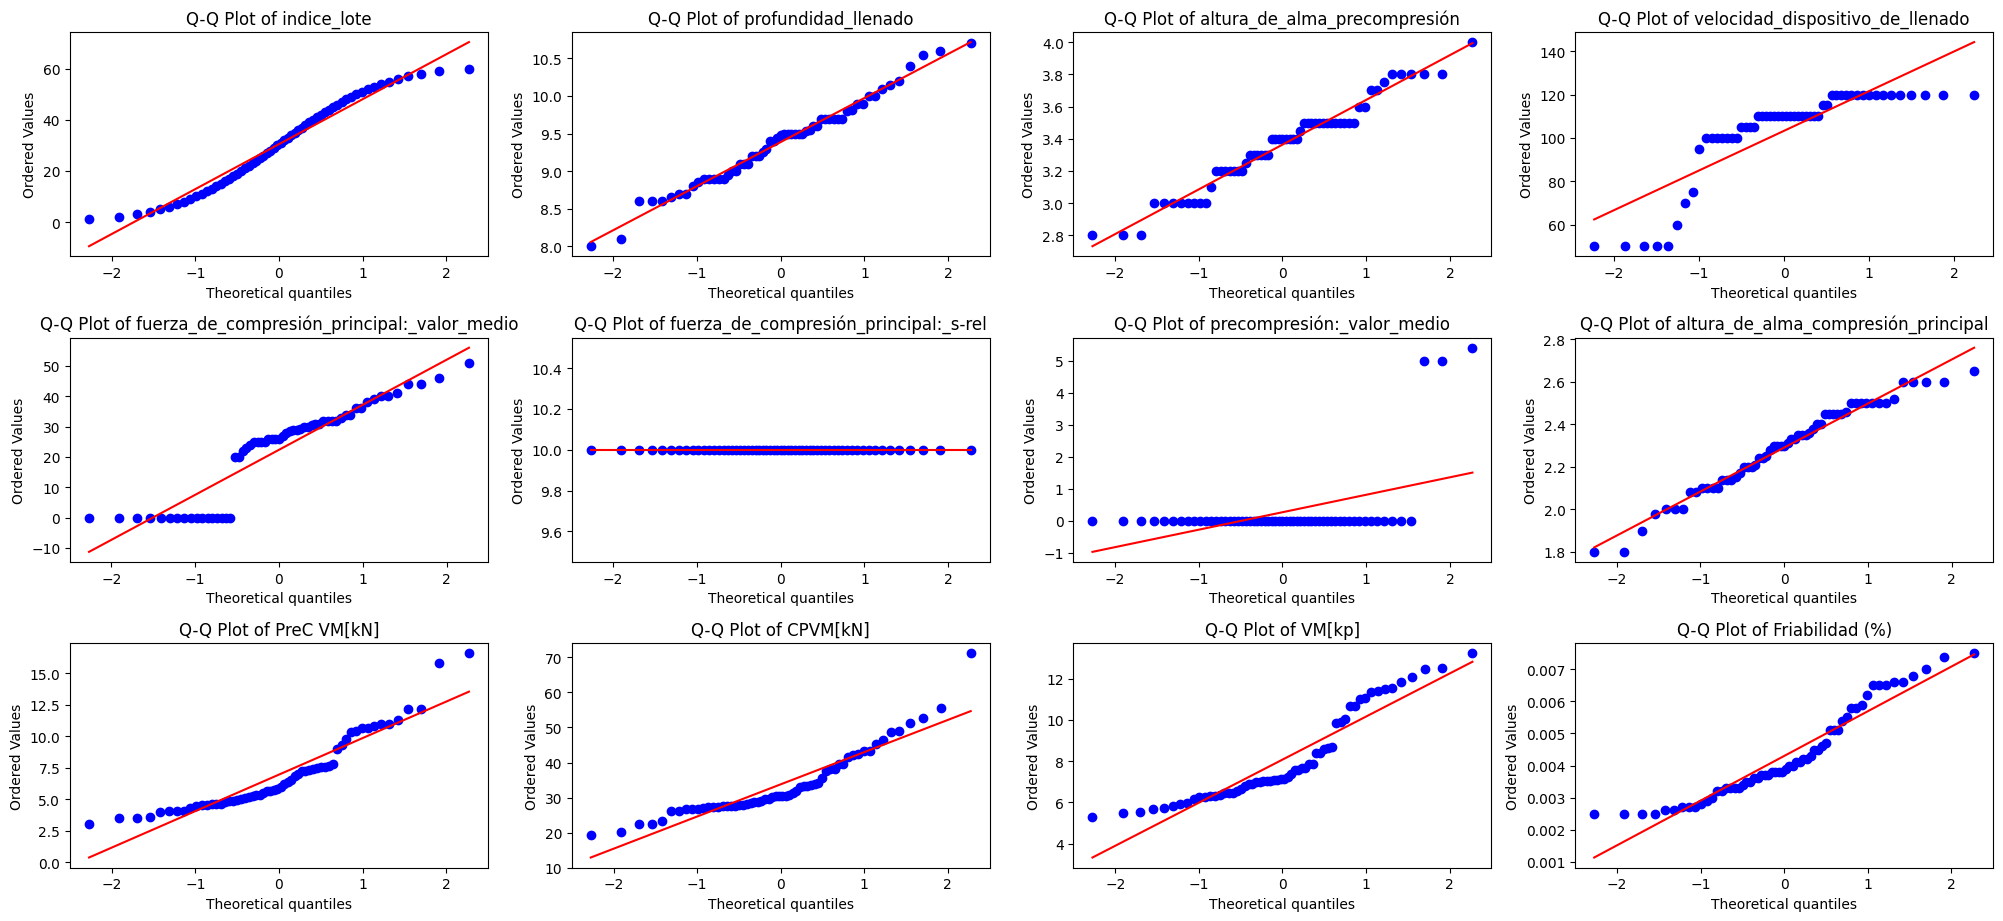

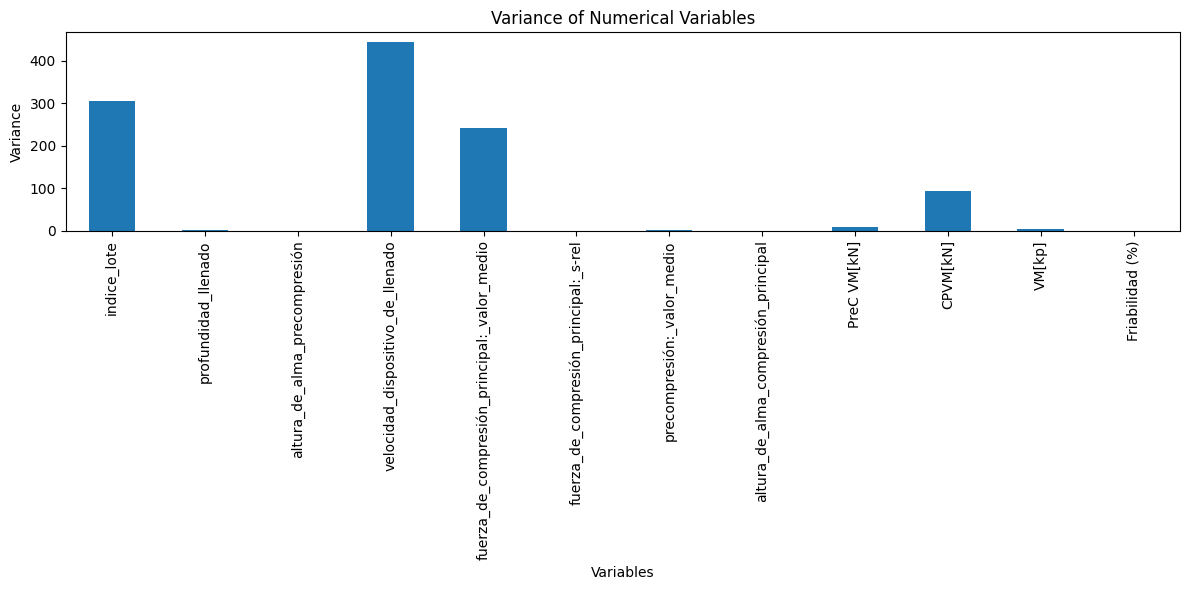

All plots have been generated and saved as PNG files.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Read the CSV data
df = pd.read_csv('reto_db_final.csv')

# 5. Histograms
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()
plt.close()


# 6 & 9. Box plots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Variables')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()
plt.close()

# 7. Q-Q plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(5, 4, i)
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
plt.tight_layout()
plt.savefig('qq_plots.png')
plt.show()
plt.close()

# 8. Variance of measurements
variances = df.select_dtypes(include=[np.number]).var()
plt.figure(figsize=(12, 6))
variances.plot(kind='bar')
plt.title('Variance of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Variance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('variances.png')
plt.show()
plt.close()

print("All plots have been generated and saved as PNG files.")